In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from datetime import datetime
import matplotlib.pyplot as plt
# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
#sns.set_context("poster") # ugly
sns.set_context("talk")  # better
plt.style.use('ggplot')

In [2]:
path = 'data/ready/{}.csv'.format('MLS')
df_mls = pd.read_csv(path)
df_mls = df_mls.drop(['10H30_beat','10H30_sports'],axis=1)
df_mls['days'] = pd.to_datetime(df_mls['days'])


In [3]:
df_mls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 3 columns):
days           2922 non-null datetime64[ns]
10H30_crime    2922 non-null int64
10H30_game     2922 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 68.6+ KB


In [4]:
df_mls.head()

,days,10H30_crime,10H30_game
0,2010-01-01,3,None_MLS
1,2010-01-02,1,None_MLS
2,2010-01-03,2,None_MLS
3,2010-01-04,1,None_MLS
4,2010-01-05,2,None_MLS


## Add features

In [5]:
wknd = [5,6]
wkday = [0,1,2,3,4]

cal = calendar()
holidays = cal.holidays(start=df_mls.days.min(), end=df_mls.days.max())
df_mls['hol'] = df_mls['days'].isin(holidays).astype('int')

df_mls['wkend'] = df_mls['days'].dt.weekday.isin(wknd).astype('int')
df_mls['wkday']= df_mls['days'].dt.weekday.isin(wkday).astype('int')
df_mls['dayofyear']=  df_mls.days.dt.dayofyear
df_mls['wkofyear'] =  df_mls.days.dt.weekofyear
df_mls['qrt'] = df_mls.days.dt.quarter
df_mls['month'] = df_mls.days.dt.month

In [6]:
df_mls.head()

,days,10H30_crime,10H30_game,hol,wkend,wkday,dayofyear,wkofyear,qrt,month
0,2010-01-01,3,None_MLS,1,0,1,1,53,1,1
1,2010-01-02,1,None_MLS,0,1,0,2,53,1,1
2,2010-01-03,2,None_MLS,0,1,0,3,53,1,1
3,2010-01-04,1,None_MLS,0,0,1,4,1,1,1
4,2010-01-05,2,None_MLS,0,0,1,5,1,1,1


In [7]:
# for i in dir(df_mls.days.dt):
#     print(i)

## Drop date

In [8]:
df_mls = df_mls.drop(['days'],axis=1)


In [9]:
df_mls.head()

,10H30_crime,10H30_game,hol,wkend,wkday,dayofyear,wkofyear,qrt,month
0,3,None_MLS,1,0,1,1,53,1,1
1,1,None_MLS,0,1,0,2,53,1,1
2,2,None_MLS,0,1,0,3,53,1,1
3,1,None_MLS,0,0,1,4,1,1,1
4,2,None_MLS,0,0,1,5,1,1,1


In [10]:
mls = pd.get_dummies(df_mls)

In [11]:
mls.head()

,10H30_crime,hol,wkend,wkday,dayofyear,wkofyear,qrt,month,10H30_game_Lost_MLS,10H30_game_None_MLS,10H30_game_Won_MLS
0,3,1,0,1,1,53,1,1,0,1,0
1,1,0,1,0,2,53,1,1,0,1,0
2,2,0,1,0,3,53,1,1,0,1,0
3,1,0,0,1,4,1,1,1,0,1,0
4,2,0,0,1,5,1,1,1,0,1,0


In [12]:
mls.head()

,10H30_crime,hol,wkend,wkday,dayofyear,wkofyear,qrt,month,10H30_game_Lost_MLS,10H30_game_None_MLS,10H30_game_Won_MLS
0,3,1,0,1,1,53,1,1,0,1,0
1,1,0,1,0,2,53,1,1,0,1,0
2,2,0,1,0,3,53,1,1,0,1,0
3,1,0,0,1,4,1,1,1,0,1,0
4,2,0,0,1,5,1,1,1,0,1,0


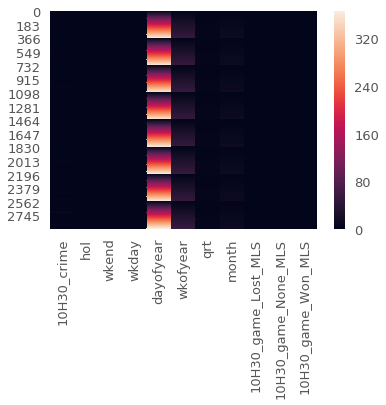

In [13]:
sns.heatmap(mls)

In [14]:
mls.head()

,10H30_crime,hol,wkend,wkday,dayofyear,wkofyear,qrt,month,10H30_game_Lost_MLS,10H30_game_None_MLS,10H30_game_Won_MLS
0,3,1,0,1,1,53,1,1,0,1,0
1,1,0,1,0,2,53,1,1,0,1,0
2,2,0,1,0,3,53,1,1,0,1,0
3,1,0,0,1,4,1,1,1,0,1,0
4,2,0,0,1,5,1,1,1,0,1,0


In [15]:
## sklern

In [16]:
X = mls.drop('10H30_crime',axis=1).values
y = mls['10H30_crime'].values

In [17]:
y

array([3, 1, 2, ..., 2, 1, 2])

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


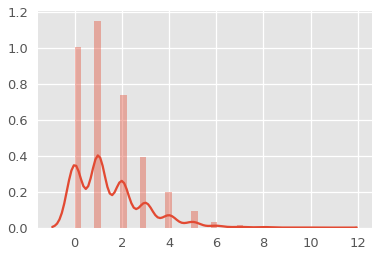

In [18]:
sns.distplot(mls[['10H30_crime']])

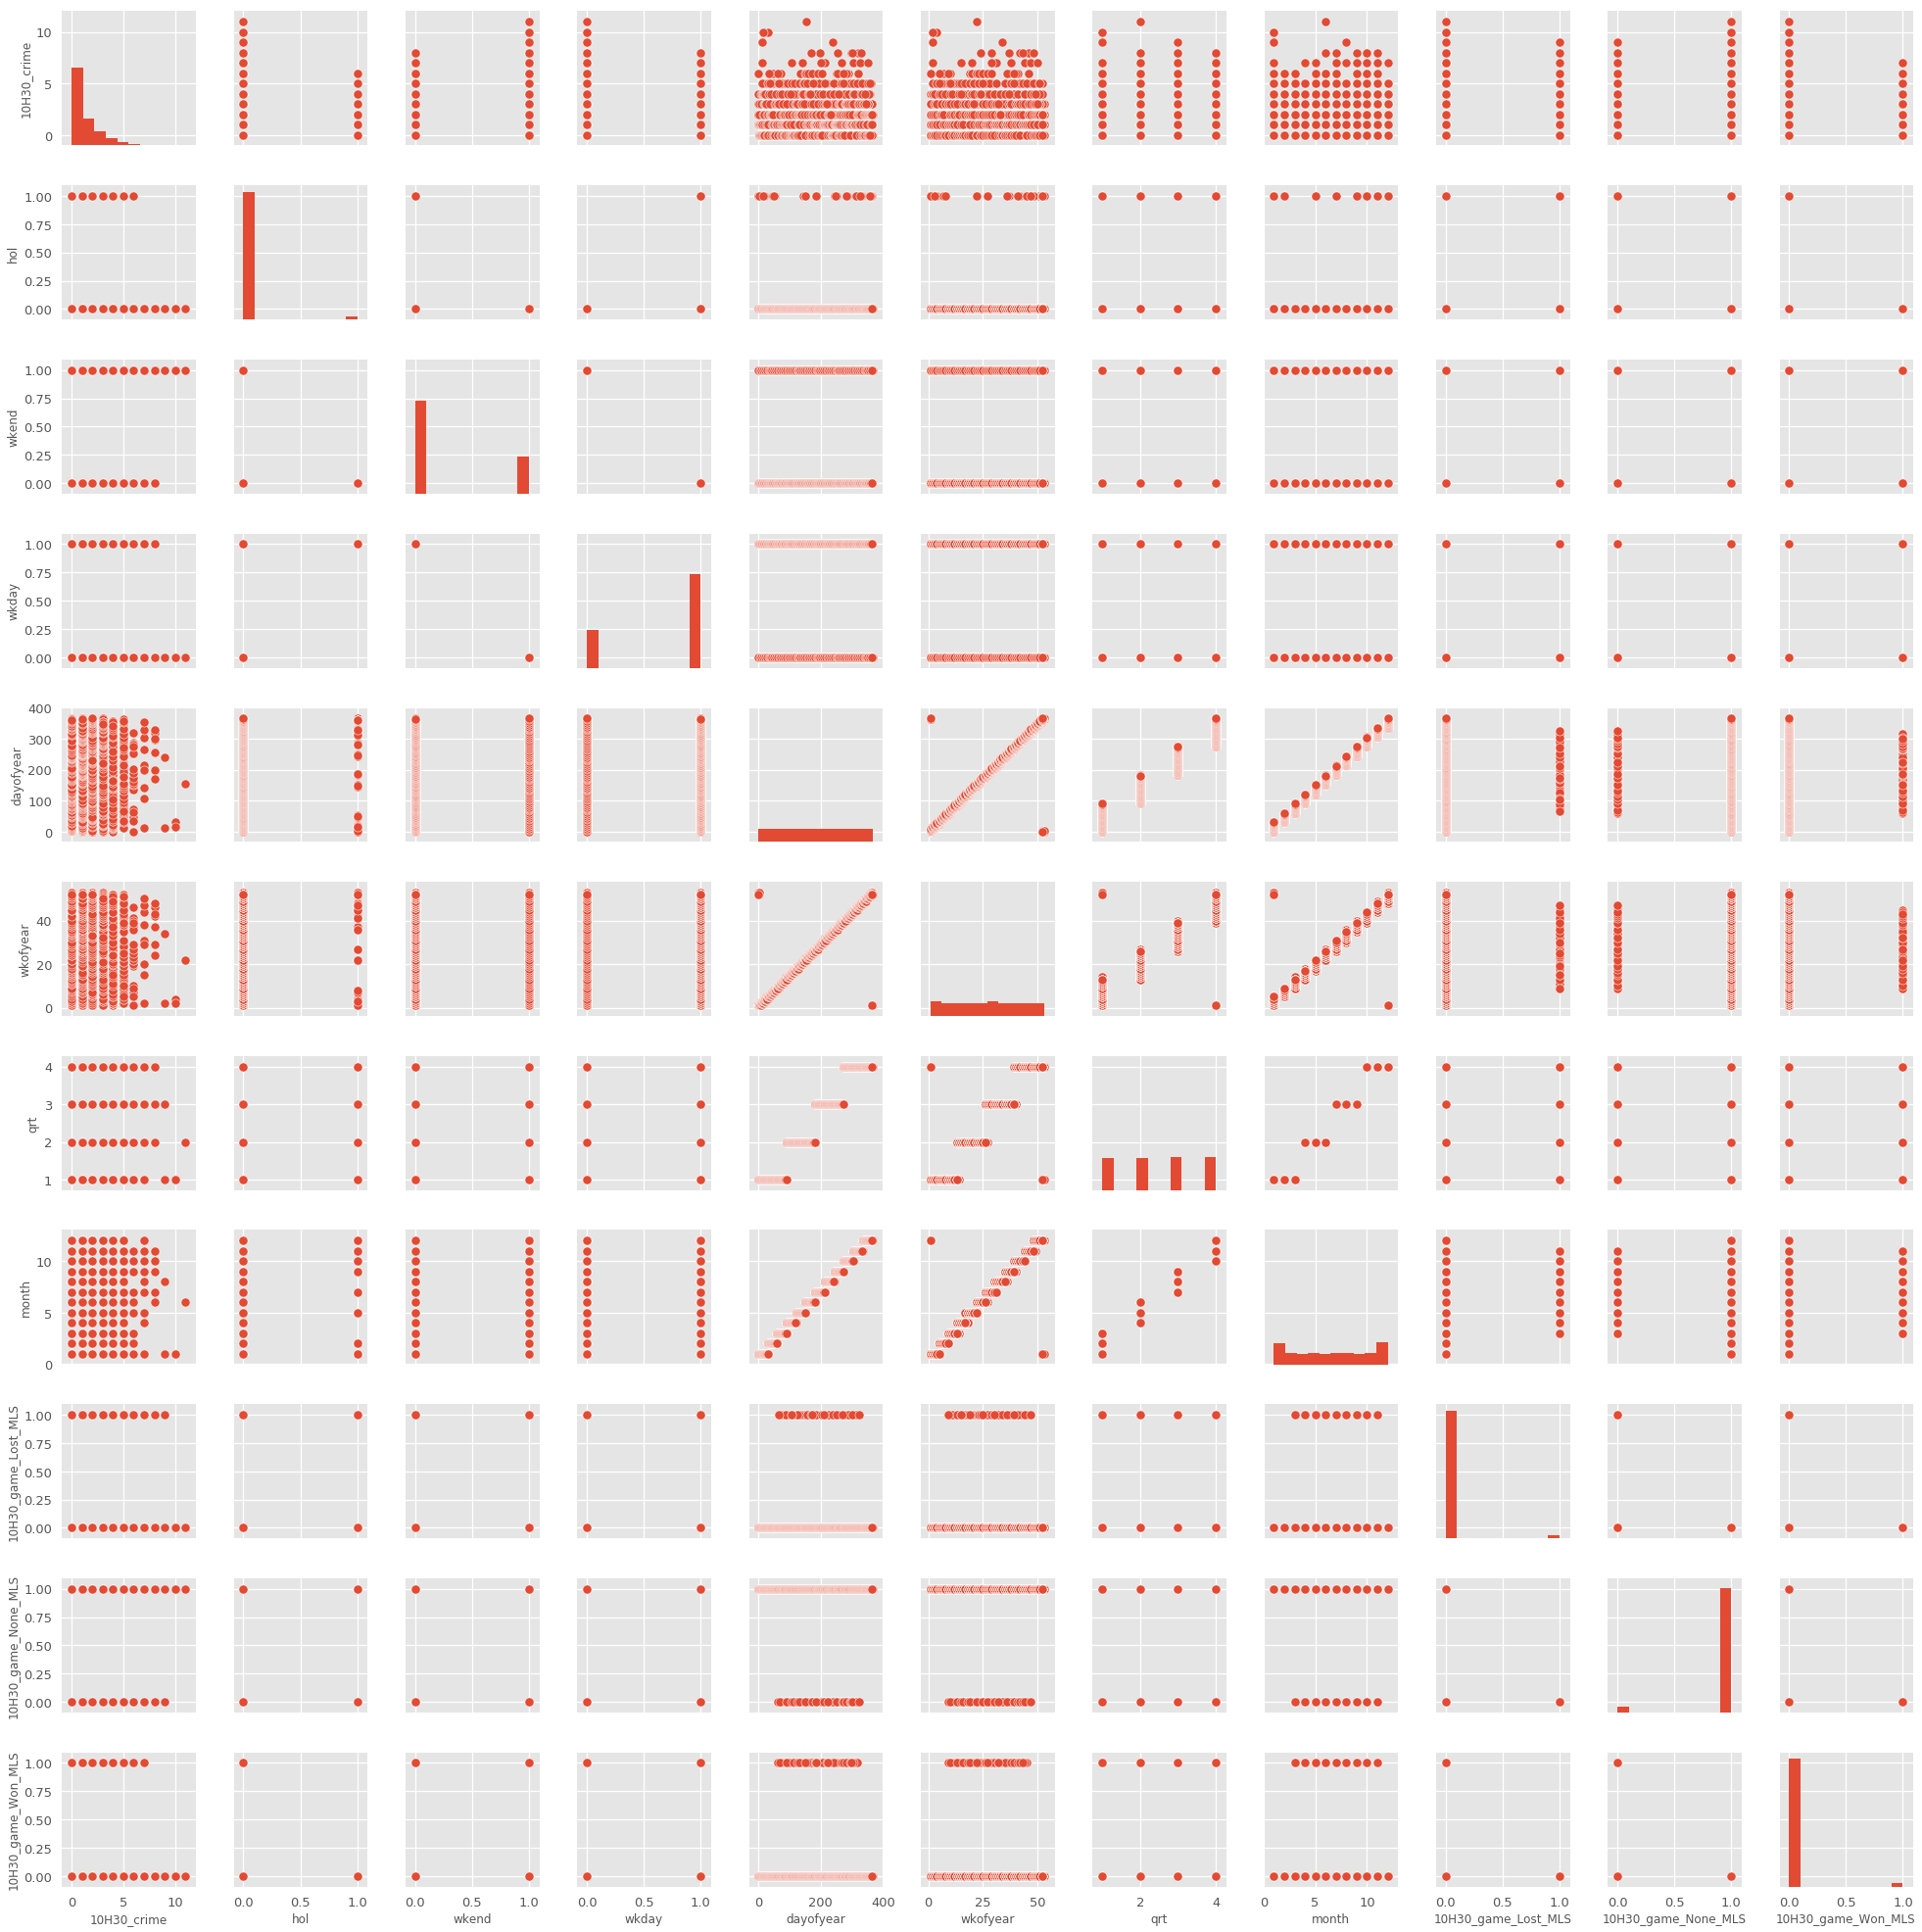

In [19]:
sns.pairplot(mls)

In [20]:
mls.head()

,10H30_crime,hol,wkend,wkday,dayofyear,wkofyear,qrt,month,10H30_game_Lost_MLS,10H30_game_None_MLS,10H30_game_Won_MLS
0,3,1,0,1,1,53,1,1,0,1,0
1,1,0,1,0,2,53,1,1,0,1,0
2,2,0,1,0,3,53,1,1,0,1,0
3,1,0,0,1,4,1,1,1,0,1,0
4,2,0,0,1,5,1,1,1,0,1,0


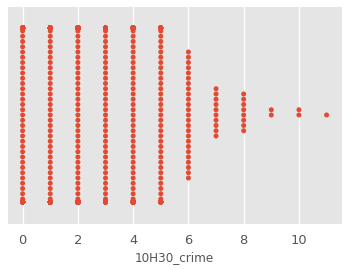

In [23]:
ax = sns.swarmplot(x=mls["10H30_crime"])


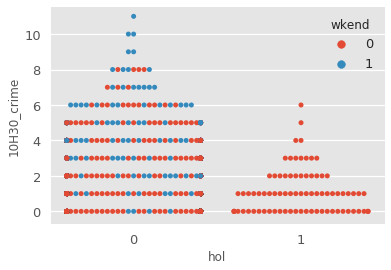

In [24]:
ax = sns.swarmplot(x="hol", y="10H30_crime", hue="wkend", data=mls)

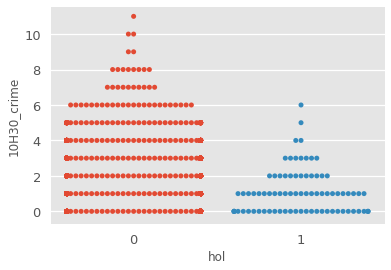

In [22]:
ax = sns.swarmplot(x="hol", y="10H30_crime", data=mls)


In [ ]:
g = sns.factorplot(x="hol", y="10H30_crime", 
                       hue="10H30_game_None_MLS", col="10H30_game_Won_MLS",
                   data=mls, kind="swarm",
                  size=4, aspect=.7);

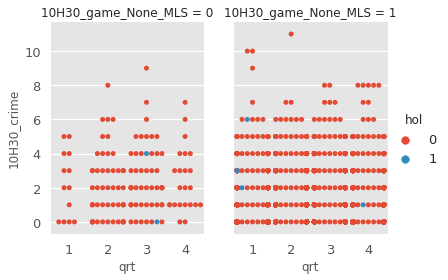

In [33]:
g = sns.factorplot(x="qrt", y="10H30_crime", 
                       hue="hol", col="10H30_game_None_MLS",
                   data=mls, kind="swarm",
                  size=4, aspect=.7);

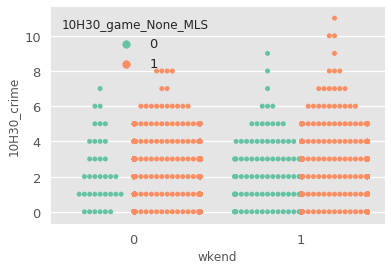

In [28]:
ax = sns.swarmplot(x="wkend", y="10H30_crime", hue="10H30_game_None_MLS",
                   data=mls, palette="Set2", dodge=True)

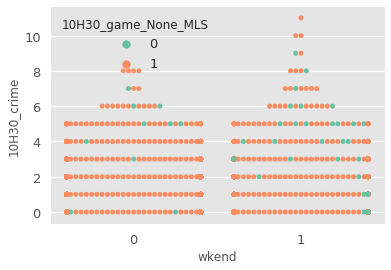

In [27]:
ax = sns.swarmplot(x="wkend", y="10H30_crime", hue="10H30_game_None_MLS",
                   data=mls, palette="Set2", dodge=False)

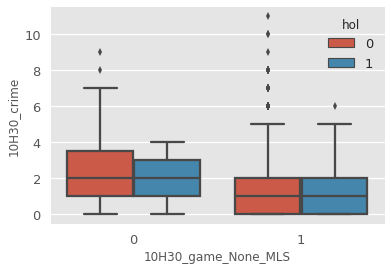

In [21]:
ax = sns.boxplot(y="10H30_crime", x="10H30_game_None_MLS", data=mls,hue='hol')

In [ ]:
ax = sns.boxplot(y="10H30_crime", x="10H30_game_None_MLS", data=mls, palette="Set2")

In [ ]:
ax = sns.boxplot(y="10H30_crime", x="10H30_game_Won_MLS", data=mls)

In [ ]:
ax = sns.boxplot(y="10H30_crime", x="10H30_game_Lost_MLS", data=mls)

In [ ]:
ax = sns.boxplot(y="10H30_crime", x="month", data=mls)

In [ ]:
ax = sns.boxplot(y="10H30_crime", x="qrt", data=mls)

In [ ]:
ax = sns.boxplot(y="10H30_crime", x="wkend", data=mls)

In [ ]:
ax = sns.boxplot(y="10H30_crime", x="hol", data=mls)

In [ ]:
y = mls['10H30_crime']
x = mls['wkofyear']
plt.scatter(x, y)
plt.xlabel("week of the year")
plt.ylabel("crimes happen")
plt.title("title")
plt.show()

In [ ]:
y = mls['10H30_crime']
x = mls['qrt']
plt.scatter(x, y)
plt.xlabel("quater of the year")
plt.ylabel("crimes happen")
plt.title("Quater v crimes")
plt.show()

In [ ]:
sns.regplot(y="month", x="10H30_crime", data=mls, fit_reg = True)


In [ ]:
plt.hist(mls['10H30_crime'], bins='auto')
plt.title("CRIM")
plt.xlabel("Crime rate")
plt.ylabel("Frequencey")
plt.show()

In [ ]:
y = mls['10H30_crime']
x = mls['month']
plt.scatter(x, y)
plt.xlabel("month of the year")
plt.ylabel("crimes happen")
plt.title("Quater v crimes")
plt.show()

In [ ]:
y = mls['10H30_crime']
x = mls['dayofyear']
plt.scatter(x, y)
plt.xlabel("day of the year")
plt.ylabel("crimes happen")
plt.title("day v crimes")
plt.show()

In [ ]:
y = mls['10H30_crime']
x = mls['wkday']
plt.scatter(x, y)
plt.xlabel("wkday of the year")
plt.ylabel("crimes happen")
plt.title("wkday v crimes")
plt.show()

In [ ]:
y = mls['10H30_crime']
x = mls['wkend']
plt.scatter(x, y)
plt.xlabel("wkend of the year")
plt.ylabel("crimes happen")
plt.title("wknd v crimes")
plt.show()

In [ ]:
y = mls['10H30_crime']
x = mls['hol']
plt.scatter(x, y)
plt.xlabel("wkday of the year")
plt.ylabel("crimes happen")
plt.title("hol v crimes")
plt.show()

In [ ]:
y = mls['10H30_crime']
x = mls['10H30_game_Lost_MLS']
plt.scatter(x, y)
plt.xlabel("game_Lost_MLS of the year")
plt.ylabel("crimes happen")
plt.title("lost a game v crimes")
plt.show()

In [ ]:
y = mls['10H30_crime']
x = mls['10H30_game_Won_MLS']
plt.scatter(x, y)
plt.xlabel("game_Won_MLS of the year")
plt.ylabel("crimes happen")
plt.title("won a game v crimes")
plt.show()

In [ ]:
y = mls['10H30_crime']
x = mls['10H30_game_None_MLS']
plt.scatter(x, y)
plt.xlabel("No games_MLS of the year")
plt.ylabel("crimes happen")
plt.title("No game v crimes")
plt.show()

In [ ]:
cc = mls['10H30_crime']


fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10, 5), sharey=False)
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(cc, bins='auto', histtype='bar')
ax0.set_title('crime')

ax1.hist(mls.dayofyear, bins='auto',histtype='bar')
ax1.set_title('dayofyear')

ax2.hist(mls.month, bins='auto', histtype='bar')
ax2.set_title('month')

ax3.hist(mls.hol, bins='auto', histtype='bar')
ax3.set_title('hol')

fig.tight_layout()
plt.show()

In [ ]:
mls.head()

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

# Load the example titanic dataset
#df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
#pal = dict('0' ="#6495ED", '1'="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="10H30_crime", y="", col="hol", hue="hol", data=mls,
                y_jitter=.02, logistic=True)
g.set(xlim=(0, 11), ylim=(-.05, 1.05))

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

# Load the example titanic dataset
#df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(hol ="#6495ED", no_hol="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="10H30_crime", y="10H30_game_Won_MLS", col="wkend", hue="wkend", data=mls,
                y_jitter=.02, logistic=True)
g.set(xlim=(0, 11), ylim=(-.05, 1.05))

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))

In [ ]:
mls['10H30_crime'].max()

In [ ]:
pal

In [ ]:
mls

In [ ]:
sns.residplot(x, y, lowess=True, color="g")


In [ ]:
x= mls['10H30_crime']
y = mls['wkend']
# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
#x = rs.normal(2, 1, 75)
#y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x, y, lowess=True, color="g")


In [ ]:
x= mls['10H30_crime']
y = mls['wkday']
# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
#x = rs.normal(2, 1, 75)
#y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x, y, lowess=True, color="g")


In [ ]:
x= mls['10H30_crime']
y = mls['hol']
# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
#x = rs.normal(2, 1, 75)
#y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x, y, lowess=True, color="g")


In [ ]:
mls.head()

In [ ]:
# x= mls['10H30_crime']
# y = mls['hol']
# sns.swarmplot(x, y,  data=mls)
